In [70]:
# импортируем все необходимые библиотеки для последующей работы с данными
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import datetime
import scipy.stats as sts
import warnings
warnings.filterwarnings("ignore")

В этой части кода мы просто считываем датафреймы с csv файлов, а также берём из них две колонки: дату и цену. Эти файлы можно найти в репозитории.

In [31]:
df1 = pd.read_csv('gazp.csv', sep=',')
df1

,Дата,Цена,Откр.,Макс.,Мин.,Объём,Изм. %
0,12.05.2023,"173,95","174,30","175,00","172,65","23,45M","-0,10%"
1,11.05.2023,"174,13","176,19","178,11","171,75","50,34M","-0,80%"
2,10.05.2023,"175,53","171,30","176,73","171,30","50,98M","2,75%"
3,08.05.2023,"170,84","172,60","172,91","170,65","11,49M","-0,73%"
4,05.05.2023,"172,09","173,66","175,48","171,16","22,70M","-0,90%"
...,...,...,...,...,...,...,...
1097,07.12.2018,"163,00","160,81","163,15","159,67","29,92M","1,48%"
1098,06.12.2018,"160,62","162,90","163,00","159,00","30,37M","-2,40%"
1099,05.12.2018,"164,57","161,23","164,57","160,31","23,41M","0,23%"
1100,04.12.2018,"164,20","164,94","165,00","162,30","21,85M","-0,73%"


In [32]:
gsp = df1[['Дата','Цена']]
gsp

,Дата,Цена
0,12.05.2023,"173,95"
1,11.05.2023,"174,13"
2,10.05.2023,"175,53"
3,08.05.2023,"170,84"
4,05.05.2023,"172,09"
...,...,...
1097,07.12.2018,"163,00"
1098,06.12.2018,"160,62"
1099,05.12.2018,"164,57"
1100,04.12.2018,"164,20"


In [33]:
df2 = pd.read_csv('LKOH.csv', sep=',')
df2

,Дата,Цена,Откр.,Макс.,Мин.,Объём,Изм. %
0,12.05.2023,"4.819,0","4.800,0","4.839,5","4.754,5","973,51K","0,64%"
1,11.05.2023,"4.788,5","4.728,5","4.848,5","4.684,0","2,37M","1,54%"
2,10.05.2023,"4.716,0","4.560,0","4.716,0","4.559,5","1,01M","3,32%"
3,08.05.2023,"4.564,5","4.524,5","4.599,5","4.517,5","363,54K","1,23%"
4,05.05.2023,"4.509,0","4.547,5","4.557,5","4.501,5","433,75K","-0,85%"
...,...,...,...,...,...,...,...
1097,07.12.2018,"5.266,5","5.170,0","5.321,5","5.103,0","1,47M","2,01%"
1098,06.12.2018,"5.162,5","5.220,0","5.325,0","5.084,0","1,36M","-1,85%"
1099,05.12.2018,"5.260,0","5.156,0","5.260,0","5.129,5","943,85K","0,98%"
1100,04.12.2018,"5.209,0","5.100,0","5.221,0","5.030,0","1,27M","2,17%"


In [34]:
luk = df2[['Дата','Цена']]
luk

,Дата,Цена
0,12.05.2023,"4.819,0"
1,11.05.2023,"4.788,5"
2,10.05.2023,"4.716,0"
3,08.05.2023,"4.564,5"
4,05.05.2023,"4.509,0"
...,...,...
1097,07.12.2018,"5.266,5"
1098,06.12.2018,"5.162,5"
1099,05.12.2018,"5.260,0"
1100,04.12.2018,"5.209,0"


In [35]:
df3 = pd.read_csv('ROSN.csv', sep=',')
df3

,Дата,Цена,Откр.,Макс.,Мин.,Объём,Изм. %
0,12.05.2023,"398,95","391,80","398,95","390,75","2,48M","1,86%"
1,11.05.2023,"391,65","392,50","398,95","387,90","4,19M","-0,11%"
2,10.05.2023,"392,10","381,00","393,45","380,25","2,26M","2,89%"
3,08.05.2023,"381,10","379,90","382,60","378,75","678,28K","0,65%"
4,05.05.2023,"378,65","379,50","383,00","376,00","1,81M","-0,34%"
...,...,...,...,...,...,...,...
1097,07.12.2018,"439,00","429,40","442,05","429,15","5,14M","2,09%"
1098,06.12.2018,"430,00","436,00","438,40","422,55","4,35M","-2,05%"
1099,05.12.2018,"439,00","434,95","439,00","430,00","2,53M","0,00%"
1100,04.12.2018,"439,00","434,00","440,55","433,25","3,08M","1,15%"


In [36]:
rosn = df3[['Дата','Цена']]
rosn

,Дата,Цена
0,12.05.2023,"398,95"
1,11.05.2023,"391,65"
2,10.05.2023,"392,10"
3,08.05.2023,"381,10"
4,05.05.2023,"378,65"
...,...,...
1097,07.12.2018,"439,00"
1098,06.12.2018,"430,00"
1099,05.12.2018,"439,00"
1100,04.12.2018,"439,00"


In [37]:
df4 = pd.read_csv('NVTK.csv', sep=',')
df4

,Дата,Цена,Откр.,Макс.,Мин.,Объём,Изм. %
0,12.05.2023,"1.270,40","1.268,20","1.273,80","1.256,00","599,70K","0,09%"
1,11.05.2023,"1.269,20","1.274,00","1.289,80","1.246,00","1,27M","-0,06%"
2,10.05.2023,"1.270,00","1.215,20","1.276,80","1.215,20","1,22M","4,51%"
3,08.05.2023,"1.215,20","1.222,00","1.234,60","1.212,00","317,09K","-0,56%"
4,05.05.2023,"1.222,00","1.232,40","1.252,60","1.218,80","751,52K","-0,63%"
...,...,...,...,...,...,...,...
1097,07.12.2018,"1.117,10","1.127,10","1.139,60","1.117,10","712,07K","-0,97%"
1098,06.12.2018,"1.128,00","1.131,00","1.132,20","1.112,00","614,18K","-0,73%"
1099,05.12.2018,"1.136,30","1.128,00","1.137,10","1.115,00","513,01K","0,56%"
1100,04.12.2018,"1.130,00","1.149,60","1.149,60","1.128,30","419,75K","-1,71%"


In [38]:
nvtk = df4[['Дата','Цена']]
nvtk

,Дата,Цена
0,12.05.2023,"1.270,40"
1,11.05.2023,"1.269,20"
2,10.05.2023,"1.270,00"
3,08.05.2023,"1.215,20"
4,05.05.2023,"1.222,00"
...,...,...
1097,07.12.2018,"1.117,10"
1098,06.12.2018,"1.128,00"
1099,05.12.2018,"1.136,30"
1100,04.12.2018,"1.130,00"


In [39]:
df5 = pd.read_csv('SNGS.csv', sep=',')
df5

,Дата,Цена,Откр.,Макс.,Мин.,Объём,Изм. %
0,12.05.2023,"23,935","23,940","24,035","23,600","14,59M","0,59%"
1,11.05.2023,"23,795","23,850","24,345","23,420","33,76M","-0,02%"
2,10.05.2023,"23,800","23,225","23,825","23,205","18,85M","2,59%"
3,08.05.2023,"23,200","23,305","23,435","23,140","6,89M","-0,43%"
4,05.05.2023,"23,300","23,600","23,725","23,250","12,35M","-1,08%"
...,...,...,...,...,...,...,...
1097,07.12.2018,"28,315","28,280","28,455","28,230","8,76M","-0,12%"
1098,06.12.2018,"28,350","28,170","28,370","27,805","17,64M","0,18%"
1099,05.12.2018,"28,300","27,970","28,300","27,455","15,41M","0,66%"
1100,04.12.2018,"28,115","27,850","28,115","27,565","10,23M","1,02%"


In [40]:
sngs = df5[['Дата','Цена']]
sngs

,Дата,Цена
0,12.05.2023,"23,935"
1,11.05.2023,"23,795"
2,10.05.2023,"23,800"
3,08.05.2023,"23,200"
4,05.05.2023,"23,300"
...,...,...
1097,07.12.2018,"28,315"
1098,06.12.2018,"28,350"
1099,05.12.2018,"28,300"
1100,04.12.2018,"28,115"


In [41]:
df6 = pd.read_csv('WTI.csv', sep=',')
df6

,Дата,Цена,Откр.,Макс.,Мин.,Объём,Изм. %
0,12.05.2023,"70,04","71,42","71,78","69,93",NaN,"-1,17%"
1,11.05.2023,"70,87","72,77","73,50","70,63","365,89K","-2,33%"
2,10.05.2023,"72,56","73,58","73,89","71,80","351,51K","-1,56%"
3,09.05.2023,"73,71","72,84","73,78","71,34","317,49K","0,75%"
4,08.05.2023,"73,16","71,35","73,69","71,04","290,08K","2,55%"
...,...,...,...,...,...,...,...
1170,07.12.2018,"52,61","51,76","54,22","50,60","987,72K","2,18%"
1171,06.12.2018,"51,49","52,93","53,30","50,08","987,27K","-2,65%"
1172,05.12.2018,"52,89","52,59","54,44","52,16","624,91K","-0,68%"
1173,04.12.2018,"53,25","53,13","54,55","52,43","738,13K","0,57%"


In [42]:
wti = df6[['Дата','Цена']]
wti

,Дата,Цена
0,12.05.2023,"70,04"
1,11.05.2023,"70,87"
2,10.05.2023,"72,56"
3,09.05.2023,"73,71"
4,08.05.2023,"73,16"
...,...,...
1170,07.12.2018,"52,61"
1171,06.12.2018,"51,49"
1172,05.12.2018,"52,89"
1173,04.12.2018,"53,25"


In [43]:
df7 = pd.read_csv('Brent.csv', sep=',')
df7

,Дата,Цена,Откр.,Макс.,Мин.,Объём,Изм. %
0,12.05.2023,"74,19","75,31","75,83","74,03",NaN,"-1,05%"
1,11.05.2023,"74,98","76,62","77,41","74,61","345,16K","-1,87%"
2,10.05.2023,"76,41","77,36","77,60","75,68","311,37K","-1,33%"
3,09.05.2023,"77,44","76,71","77,50","75,07","283,41K","0,56%"
4,08.05.2023,"77,01","75,23","77,43","74,95","185,75K","2,27%"
...,...,...,...,...,...,...,...
1142,07.12.2018,"61,67","60,25","63,73","59,10","423,08K","2,68%"
1143,06.12.2018,"60,06","61,36","61,97","58,36","399,99K","-2,44%"
1144,05.12.2018,"61,56","61,35","63,29","60,80","256,24K","-0,84%"
1145,04.12.2018,"62,08","61,90","63,58","61,24","277,42K","0,63%"


In [44]:
brent = df7[['Дата','Цена']]
brent

,Дата,Цена
0,12.05.2023,"74,19"
1,11.05.2023,"74,98"
2,10.05.2023,"76,41"
3,09.05.2023,"77,44"
4,08.05.2023,"77,01"
...,...,...
1142,07.12.2018,"61,67"
1143,06.12.2018,"60,06"
1144,05.12.2018,"61,56"
1145,04.12.2018,"62,08"


In [45]:
df8 = pd.read_csv('gaz.csv', sep=',')
df8

,Дата,Цена,Откр.,Макс.,Мин.,Объём,Изм. %
0,12.05.2023,"2,276","2,181","2,332","2,148",NaN,"3,93%"
1,11.05.2023,"2,190","2,182","2,255","2,165","119,03K","-0,05%"
2,10.05.2023,"2,191","2,262","2,265","2,160","126,49K","-3,35%"
3,09.05.2023,"2,267","2,249","2,297","2,184","134,53K","1,30%"
4,08.05.2023,"2,238","2,148","2,255","2,140","125,35K","4,73%"
...,...,...,...,...,...,...,...
1168,07.12.2018,"4,488","4,348","4,570","4,231","182,16K","3,72%"
1169,06.12.2018,"4,327","4,450","4,489","4,271","132,56K","-3,18%"
1170,05.12.2018,"4,469","4,518","4,630","4,404","105,11K","0,27%"
1171,04.12.2018,"4,457","4,392","4,574","4,358","159,87K","2,72%"


In [46]:
gaz = df8[['Дата','Цена']]
gaz

,Дата,Цена
0,12.05.2023,"2,276"
1,11.05.2023,"2,190"
2,10.05.2023,"2,191"
3,09.05.2023,"2,267"
4,08.05.2023,"2,238"
...,...,...
1168,07.12.2018,"4,488"
1169,06.12.2018,"4,327"
1170,05.12.2018,"4,469"
1171,04.12.2018,"4,457"


In [47]:
df9 = pd.read_csv('USD_RUB.csv', sep=',')
df9

,Дата,Цена,Откр.,Макс.,Мин.,Объём,Изм. %
0,12.05.2023,"77,9200","76,9000","77,9793","76,2400",NaN,"1,33%"
1,11.05.2023,"76,9000","76,0575","77,2017","75,2510",NaN,"1,11%"
2,10.05.2023,"76,0575","78,1875","78,1875","75,8770",NaN,"-2,72%"
3,08.05.2023,"78,1875","77,3800","78,4860","76,6700",NaN,"1,04%"
4,05.05.2023,"77,3800","78,0500","78,2116","76,3419",NaN,"-0,86%"
...,...,...,...,...,...,...,...
1119,07.12.2018,"66,4006","66,8741","67,0439","66,0028",NaN,"-0,71%"
1120,06.12.2018,"66,8741","66,5669","67,1998","66,5669",NaN,"0,46%"
1121,05.12.2018,"66,5669","66,8401","66,8793","66,4718",NaN,"-0,41%"
1122,04.12.2018,"66,8401","66,5095","66,8968","66,2103",NaN,"0,50%"


In [48]:
usd_rub = df9[['Дата','Цена']]
usd_rub

,Дата,Цена
0,12.05.2023,"77,9200"
1,11.05.2023,"76,9000"
2,10.05.2023,"76,0575"
3,08.05.2023,"78,1875"
4,05.05.2023,"77,3800"
...,...,...
1119,07.12.2018,"66,4006"
1120,06.12.2018,"66,8741"
1121,05.12.2018,"66,5669"
1122,04.12.2018,"66,8401"


In [49]:
# Загружаем данные по ковиду. Файл covid.csv мы получили с помощью парсинга
covid = pd.read_csv('covid.csv', sep=',')
covid['Дата'] = pd.to_datetime(covid['Дата'], dayfirst=True)
covid

,Дата,"Количество заболевших COVID-19, чел."
0,2023-05-29,20661046
1,2023-05-28,20686179
2,2023-05-27,20723589
3,2023-05-26,20732459
4,2023-05-25,20733109
...,...,...
1219,2020-01-26,2010
1220,2020-01-25,1353
1221,2020-01-24,879
1222,2020-01-23,606


In [182]:
# Загрузим данные по евро
euro = pd.read_csv("eur_quotes.csv", sep=';')
euro = euro.rename(columns={'updated': 'Дата', 'price': 'Euro_Rub'})
euro['Дата'] = pd.to_datetime(euro['Дата'], dayfirst=True)
euro

,Дата,Euro_Rub
0,2023-05-29,85.9190
1,2023-05-28,85.9190
2,2023-05-27,85.9190
3,2023-05-26,85.8767
4,2023-05-25,86.1995
...,...,...
6365,1999-01-11,25.8900
6366,1999-01-07,25.7300
6367,1999-01-06,24.4000
6368,1999-01-05,24.0900


In [50]:
luk = luk.rename(columns={'Цена': 'Лукойл'})
gsp = gsp.rename(columns={'Цена': 'Газпром'})
rosn = rosn.rename(columns={'Цена': 'РосНефть'})
nvtk = nvtk.rename(columns={'Цена': 'Новатэк'})
sngs = sngs.rename(columns={'Цена': 'Сургутнефтегаз'})
wti = wti.rename(columns={'Цена': 'WTI'})
brent = brent.rename(columns={'Цена': 'Brent'})
gaz = gaz.rename(columns={'Цена': 'Природный газ'})
usd_rub = usd_rub.rename(columns={'Цена': 'Usd_Rub'})

In [51]:
# объединяем все отдельные датафреймы в одну колонку
merged_df = pd.merge(gsp, luk, on="Дата", how='left')
merged_df = pd.merge(merged_df, rosn, on="Дата", how='left')
merged_df = pd.merge(merged_df, nvtk, on="Дата", how='left')
merged_df = pd.merge(merged_df, sngs, on="Дата", how='left')
merged_df = pd.merge(merged_df, wti, on="Дата", how='left')
merged_df = pd.merge(merged_df, brent, on="Дата", how='left')
merged_df = pd.merge(merged_df, gaz, on="Дата", how='left')
merged_df = pd.merge(merged_df, usd_rub, on="Дата", how='left')


display(merged_df)

,Дата,Газпром,Лукойл,РосНефть,Новатэк,Сургутнефтегаз,WTI,Brent,Природный газ,Usd_Rub
0,12.05.2023,"173,95","4.819,0","398,95","1.270,40","23,935","70,04","74,19","2,276","77,9200"
1,11.05.2023,"174,13","4.788,5","391,65","1.269,20","23,795","70,87","74,98","2,190","76,9000"
2,10.05.2023,"175,53","4.716,0","392,10","1.270,00","23,800","72,56","76,41","2,191","76,0575"
3,08.05.2023,"170,84","4.564,5","381,10","1.215,20","23,200","73,16","77,01","2,238","78,1875"
4,05.05.2023,"172,09","4.509,0","378,65","1.222,00","23,300","71,34","75,30","2,137","77,3800"
...,...,...,...,...,...,...,...,...,...,...
1097,07.12.2018,"163,00","5.266,5","439,00","1.117,10","28,315","52,61","61,67","4,488","66,4006"
1098,06.12.2018,"160,62","5.162,5","430,00","1.128,00","28,350","51,49","60,06","4,327","66,8741"
1099,05.12.2018,"164,57","5.260,0","439,00","1.136,30","28,300","52,89","61,56","4,469","66,5669"
1100,04.12.2018,"164,20","5.209,0","439,00","1.130,00","28,115","53,25","62,08","4,457","66,8401"


In [52]:
# переведем даты в формат datetime

merged_df['Дата'] = pd.to_datetime(merged_df['Дата'],dayfirst=True)

После определения данных для данной таблицы и перешли к созданию индекса, объединяющего стоимость акций компании в одно целое.

Для этого добавим данные о количестве акций в обращении по каждой компании и посчитаем её капитализацию.

In [53]:
# для начала переведём цены акций к типу float
merged_df['Газпром'] = merged_df['Газпром'].str.replace(',','.')
merged_df['Газпром'] = pd.to_numeric(merged_df['Газпром'])

merged_df['Лукойл'] = merged_df['Лукойл'].str.replace('.','')
merged_df['Лукойл'] = merged_df['Лукойл'].str.replace(',','.')
merged_df['Лукойл'] = pd.to_numeric(merged_df['Лукойл'])

merged_df['РосНефть'] = merged_df['РосНефть'].str.replace(',','.')
merged_df['РосНефть'] = pd.to_numeric(merged_df['РосНефть'])

merged_df['Новатэк'] = merged_df['Новатэк'].str.replace('.','')
merged_df['Новатэк'] = merged_df['Новатэк'].str.replace(',','.')
merged_df['Новатэк'] = pd.to_numeric(merged_df['Новатэк'])

merged_df['Сургутнефтегаз'] = merged_df['Сургутнефтегаз'].str.replace(',','.')
merged_df['Сургутнефтегаз'] = pd.to_numeric(merged_df['Сургутнефтегаз'])

merged_df['WTI'] = merged_df['WTI'].str.replace(',','.')
merged_df['WTI'] = pd.to_numeric(merged_df['WTI'])

merged_df['Brent'] = merged_df['Brent'].str.replace(',','.')
merged_df['Brent'] = pd.to_numeric(merged_df['Brent'])

merged_df['Природный газ'] = merged_df['Природный газ'].str.replace(',','.')
merged_df['Природный газ'] = pd.to_numeric(merged_df['Природный газ'])

merged_df['Usd_Rub'] = merged_df['Usd_Rub'].str.replace(',','.')
merged_df['Usd_Rub'] = pd.to_numeric(merged_df['Usd_Rub'])

In [54]:
# затем посчитаем  и добавим в таблицу капитализацию компаний, число акций у которых всегда было константой
gazp_shares = 23673000000
merged_df['Капитализация "Газпром"'] = merged_df['Газпром']*gazp_shares

rosn_shares = 10598000000
merged_df['Капитализация "РосНефть"'] = merged_df['РосНефть']*rosn_shares

nvtk_shares = 3036000000
merged_df['Капитализация "Новатэк"'] = merged_df['Новатэк']*nvtk_shares

sngs_shares = 35726000000
merged_df['Капитализация "Сургутнефтегаз"'] = merged_df['Сургутнефтегаз']*sngs_shares

In [55]:
# теперь посчитаем капитализацию "Лукойла", количество акций которого дважды менялось на рассматриваемом промежутке времени

lkoh_shares_from_03_12_2018 = 750.0 * 1000000
lkoh_shares_from_02_09_2019 = 715.0 * 1000000
lkoh_shares_from_02_03_2020 = 692.865762 * 1000000

# найдём индекс последнего дня, когда акций было 750 млн
date_1 = merged_df.loc[merged_df['Дата'] < '2019-09-02'].index[0]
# аналогично найдём последнюю дату, когда количество акций было равно 715 млн
date_2 = merged_df.loc[merged_df['Дата'] < '2020-03-02'].index[0]

merged_df['Число акций "Лукойл"'] = merged_df.index
merged_df['Число акций "Лукойл"'] = merged_df['Число акций "Лукойл"'].apply(lambda x: lkoh_shares_from_03_12_2018*1000
                                                                            if x > date_1 else x)
merged_df['Число акций "Лукойл"'] = merged_df['Число акций "Лукойл"'].apply(lambda x: lkoh_shares_from_02_09_2019*1000
                                                                            if ((x > date_2) & (x < date_1)) else x)
merged_df['Число акций "Лукойл"'] = merged_df['Число акций "Лукойл"'].apply(lambda x: lkoh_shares_from_02_03_2020*1000
                                                                            if x < date_2 else x)

merged_df['Число акций "Лукойл"'] = merged_df['Число акций "Лукойл"']/1000
#умножение и деление на 1000 сделано, чтобы не путать значение переменной с индексом наблюдения (т.к. они одного порядка)

merged_df['Капитализация "Лукойл"'] = merged_df['Число акций "Лукойл"']*merged_df['Лукойл']

merged_df = merged_df.drop('Число акций "Лукойл"', axis=1)

In [56]:
# создадим отдельную колонку с целевой переменной - суммой капитализаций

merged_df['Суммарная капитализация'] = (merged_df['Капитализация "Лукойл"'] + merged_df['Капитализация "Газпром"'] + merged_df['Капитализация "РосНефть"'] + merged_df['Капитализация "Новатэк"'] + merged_df['Капитализация "Сургутнефтегаз"'])/1000000000

Сделаем суммарную капитализацию измеримой в млрд. рублях, для этого мы поделили сумму всех капитализаций на 1 000 000 000.

Добавим к нашей таблице информацию по ковиду и курсу евро.

In [183]:
# добавляем к нашему датафрейму инфорамцию по ковиду и евро, а также заполняем пропуски в столбеце с ковидом нулями
itog_dataset = merged_df[['Дата', 'Суммарная капитализация', 'WTI', 'Brent', 'Природный газ', 'Usd_Rub']]
itog_dataset = pd.merge(itog_dataset, covid, on="Дата", how='left')
itog_dataset = pd.merge(itog_dataset, euro, on="Дата", how='left')
itog_dataset['Количество заболевших COVID-19, чел.'].fillna(0, inplace=True)
itog_dataset

,Дата,Суммарная капитализация,WTI,Brent,Природный газ,Usd_Rub,"Количество заболевших COVID-19, чел.",Euro_Rub
0,2023-05-12,16396.946767,70.04,74.19,2.276,77.9200,20718996.0,82.8877
1,2023-05-11,16294.065261,70.87,74.98,2.190,76.9000,20725841.0,84.1498
2,2023-05-10,16284.351224,72.56,76.41,2.191,76.0575,20729841.0,84.9073
3,2023-05-08,15763.969291,73.16,77.01,2.238,78.1875,20712436.0,84.9073
4,2023-05-05,15753.358791,71.34,75.30,2.137,77.3800,20690046.0,86.9986
...,...,...,...,...,...,...,...,...
1097,2018-12-07,16864.193290,52.61,61.67,4.488,66.4006,0.0,75.6071
1098,2018-12-06,16668.812360,51.49,60.06,4.327,66.8741,0.0,75.7051
1099,2018-12-05,16954.240210,52.89,61.56,4.469,66.5669,0.0,75.6562
1100,2018-12-04,16881.495090,53.25,62.08,4.457,66.8401,0.0,75.3874


# Первичная обработка данных, работа с пропусками.


In [186]:
# Посмотрим сколько внутри наших данных пустых значений
itog_dataset.isnull().sum()

Дата                                      0
Суммарная капитализация                   0
WTI                                       9
Brent                                    11
Природный газ                             9
Usd_Rub                                   0
Количество заболевших COVID-19, чел.      0
Euro_Rub                                172
dtype: int64

Пропуски в ценах на нефть WTI, Brent, природый газ и курс евро можно заменить на значение в предыдщий день, так как когда торги приостанавливаются, актуальной ценой является цена закрытия торгов в предыдщий день. А именно из-за приостановки торгов в наших данных и появились пропуски.

In [188]:
df = itog_dataset
# функция, которая заполняет пропуски предыдущими значениями в столбце.
def replace_na_with_neighbors_sum(df, column):
    df_new = df.copy()
    df_new[column].fillna(method='bfill', inplace=True)
    #df_new[column] = (df_new[column] + df_new[column].shift(1))/2
    #df_new[column].fillna(method='bfill', inplace=True)
    return df_new

df = replace_na_with_neighbors_sum(df, 'WTI')
df = replace_na_with_neighbors_sum(df, 'Brent')
df = replace_na_with_neighbors_sum(df, 'Природный газ')
df = replace_na_with_neighbors_sum(df, 'Euro_Rub')
df['Euro_Rub'].fillna(75.7484, inplace=True)
itog_dataset = df
itog_dataset

,Дата,Суммарная капитализация,WTI,Brent,Природный газ,Usd_Rub,"Количество заболевших COVID-19, чел.",Euro_Rub
0,2023-05-12,16396.946767,70.04,74.19,2.276,77.9200,20718996.0,82.8877
1,2023-05-11,16294.065261,70.87,74.98,2.190,76.9000,20725841.0,84.1498
2,2023-05-10,16284.351224,72.56,76.41,2.191,76.0575,20729841.0,84.9073
3,2023-05-08,15763.969291,73.16,77.01,2.238,78.1875,20712436.0,84.9073
4,2023-05-05,15753.358791,71.34,75.30,2.137,77.3800,20690046.0,86.9986
...,...,...,...,...,...,...,...,...
1097,2018-12-07,16864.193290,52.61,61.67,4.488,66.4006,0.0,75.6071
1098,2018-12-06,16668.812360,51.49,60.06,4.327,66.8741,0.0,75.7051
1099,2018-12-05,16954.240210,52.89,61.56,4.469,66.5669,0.0,75.6562
1100,2018-12-04,16881.495090,53.25,62.08,4.457,66.8401,0.0,75.3874


Убедимся в том, что наша итоговая таблица не содержит пропусков

In [190]:
itog_dataset.isnull().sum()

Дата                                    0
Суммарная капитализация                 0
WTI                                     0
Brent                                   0
Природный газ                           0
Usd_Rub                                 0
Количество заболевших COVID-19, чел.    0
Euro_Rub                                0
dtype: int64

In [199]:
#сохраним наш датафрейм в отдельный файл формата .csv
itog_dataset.to_csv('itog_dataset.csv', index=False)

In [196]:
# рассмотрим матрицу корреляции в получившеся итоговом датафрейме
display(itog_dataset.corr())

,Суммарная капитализация,WTI,Brent,Природный газ,Usd_Rub,"Количество заболевших COVID-19, чел.",Euro_Rub
Суммарная капитализация,1.000000,0.129607,0.083330,-0.013550,0.204609,0.250663,0.356607
WTI,0.129607,1.000000,0.989875,0.789390,-0.235080,0.606009,-0.336840
Brent,0.083330,0.989875,1.000000,0.789450,-0.287594,0.564574,-0.395704
Природный газ,-0.013550,0.789390,0.789450,1.000000,-0.347580,0.449004,-0.442224
Usd_Rub,0.204609,-0.235080,-0.287594,-0.347580,1.000000,0.427552,0.928037
"Количество заболевших COVID-19, чел.",0.250663,0.606009,0.564574,0.449004,0.427552,1.000000,0.310993
Euro_Rub,0.356607,-0.336840,-0.395704,-0.442224,0.928037,0.310993,1.000000


Можно увидеть, что суммарная капитализация сильнее всего коррелирует с 3 показателями: курсом доллара, курсом евро, а также с количеством заболевших ковид.
    

# Визуализация 
Построим график капитализаций компаний во времени.

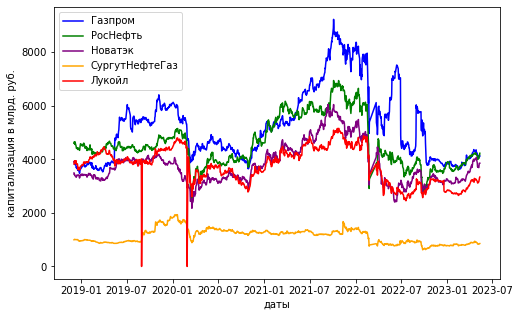

In [191]:
gazprom = merged_df['Капитализация "Газпром"']/1000000000
rosneft = merged_df['Капитализация "РосНефть"']/1000000000
novatek = merged_df['Капитализация "Новатэк"']/1000000000
surgut = merged_df['Капитализация "Сургутнефтегаз"']/1000000000
lukoil = merged_df['Капитализация "Лукойл"']/1000000000

data = merged_df['Дата']
gazprom

plt.figure(figsize=(8, 5))
plt.plot(data, gazprom, color='blue', label='Газпром')
plt.plot(data, rosneft, color='green', label='РосНефть')
plt.plot(data, novatek, color='purple', label='Новатэк')
plt.plot(data, surgut, color='orange', label='СургутНефтеГаз')
plt.plot(data, lukoil, color='red', label='Лукойл')
plt.xlabel('даты')
plt.legend(loc='upper left')
plt.ylabel('капитализация в млрд. руб.')
plt.show()

Мы видим, что динамика капитализаций рассматриваемых компаний очень схожа между компаниями. Проанализировав этот график мы выдвинули несколько гипотез (гипотезы рассмотрены ниже в файле).

В нижепостроенных рафиках построим облака распредления суммарной капитализации и параметров по отдельности, чтобы сделать предположения о взаимосвязи и её виде. 

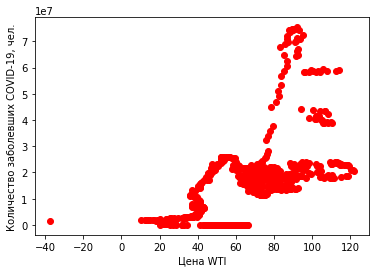

In [215]:
# рассмотрим облако распределния цены на нефть WTI и количества заболевших covid с помощью диаграммы рассеивания
plt.scatter(x = itog_dataset['WTI'], y = itog_dataset['Количество заболевших COVID-19, чел.'], color='red')
plt.xlabel('Цена WTI')
plt.ylabel('Количество заболевших COVID-19, чел.')
plt.show()

Заметной связи нет, но корреляция наблюдается слаюоположительной.

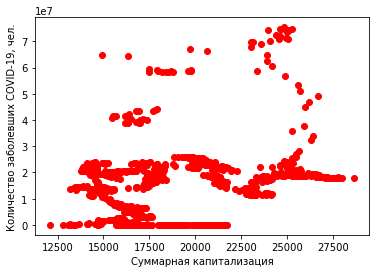

In [214]:
# рассмотрим взаимосвязь числа заболевших и суммарной капитализации с помощью диаграммы рассеивания
plt.scatter(x = itog_dataset['Суммарная капитализация'], y = itog_dataset['Количество заболевших COVID-19, чел.'], color='red')
plt.xlabel('Суммарная капитализация')
plt.ylabel('Количество заболевших COVID-19, чел.')
plt.show()

Заметной взаимосвязи между числом болеющих и суммарной капитализации не наблюдается

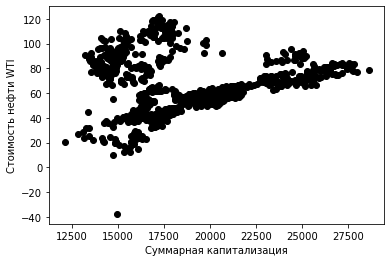

In [213]:
# рассмотрим взаимосвязь цены на нефть WTI и суммарной капитализации с помощью диаграммы рассеивания
plt.scatter(x = itog_dataset['Суммарная капитализация'], y = itog_dataset['WTI'], color='black')
plt.xlabel('Суммарная капитализация')
plt.ylabel('Стоимость нефти WTI')
plt.show()

Связь наблдюается слабо-положительной

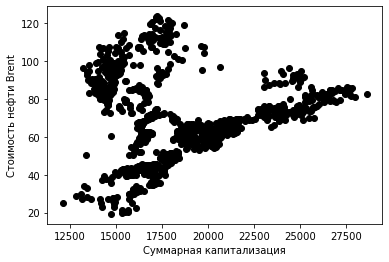

In [212]:
# рассмотрим взаимосвязь цены на нефть Brent и суммарной капитализации с помощью диаграммы рассеивания
plt.scatter(x = itog_dataset['Суммарная капитализация'], y = itog_dataset['Brent'], color='black')
plt.xlabel('Суммарная капитализация')
plt.ylabel('Стоимость нефти Brent')
plt.show()

Облако распределения очень схоже с облаком распределения нефти WTI и суммарной капитализации. Если не облако в верхнем левом углу - вероятнее всего оно является последствием шока февраля 2022 года, то связь и вовсе можно назвать близкой к линейной.

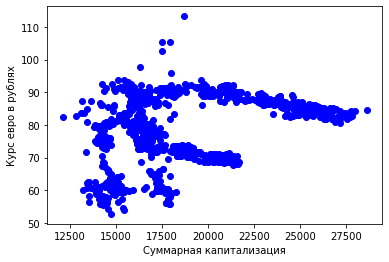

In [217]:
# рассмотрим взаимосвязь курса евро к рублю и суммарнй капитализации с помощью диаграммы рассеивания
plt.scatter(x = itog_dataset['Суммарная капитализация'], y = itog_dataset['Euro_Rub'], color='blue')
plt.xlabel('Суммарная капитализация')
plt.ylabel('Курс евро в рублях')
plt.show()

Чётко выраженнлй связи не наблюдается.

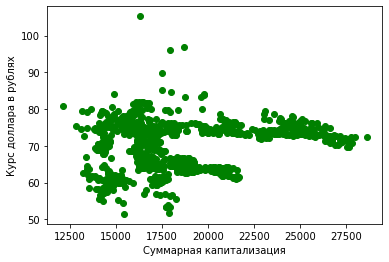

In [216]:
# рассмотрим взаимосвязь курса евро к рублю и суммарнй капитализации с помощью диаграммы рассеивания
plt.scatter(x = itog_dataset['Суммарная капитализация'], y = itog_dataset['Usd_Rub'], color='green')
plt.xlabel('Суммарная капитализация')
plt.ylabel('Курс доллара в рублях')
plt.show()

Связь по характеру напоминает связь евро и суммарной капитализации компании. Чёткой линейной взаимосвязи не наблюдается.

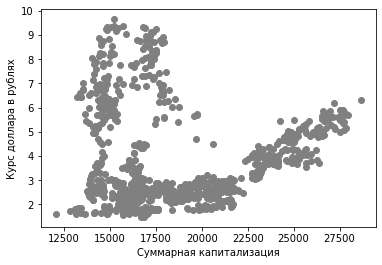

In [219]:
# Наконец, рассмотрим взаимосвязь между стомиостью газа и суммарной капитализацией компаний
# рассмотрим взаимосвязь курса евро к рублю и суммарнй капитализации с помощью диаграммы рассеивания
plt.scatter(x = itog_dataset['Суммарная капитализация'], y = itog_dataset['Природный газ'], color='grey')
plt.xlabel('Суммарная капитализация')
plt.ylabel('Курс доллара в рублях')
plt.show()

Взаимосвязь по характеру напоминает взаимосвязь со стоимость нефти Brent и WTI. Если бы не облако в верхней левой части диаграммы рассеяния, можно было бы преположить о положительной взаимосвязи между стоимостью газа и суммарной капитализацией компаний.

# Гипотеза №1
По графику динамики капитализаций компаний во времени можно увидеть, что капитализация Лукойла и капитализация Новатэка сильно похожи между собой. Выглядит так, как будто их капитализации совпадают.

Гипотезу можно записать следующим образом:

**H0: m_lucoil $=$ m_novatek**

**H1: m_lucoil $\neq$ m_novatek**

проверим её с уровнем значимости 0.05

0       5.180143e+11
1       5.355035e+11
2       5.881651e+11
3       5.267614e+11
4       5.858603e+11
            ...     
1097   -5.583594e+11
1098   -4.472670e+11
1099   -4.951932e+11
1100   -4.760700e+11
1101   -3.333858e+11
Length: 1102, dtype: float64

5.813729443703031e+23 4.567817018625547e+23


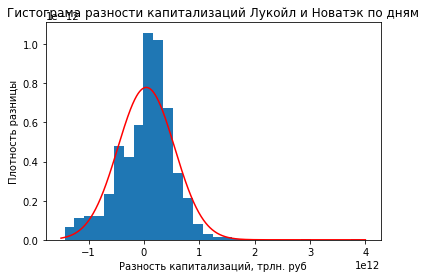

In [192]:
# посчитаем разность капитализаций компаний по дням и посмотрим гистограму для неё.
dm = merged_df['Капитализация "Новатэк"'] - merged_df['Капитализация "Лукойл"']
display(dm)
plt.hist(dm, bins = 30, density=True)

xs = np.linspace(-1.5*10**12, 4*10**12, 1000)
ys = sts.norm(loc=dm.mean(), scale=dm.std()).pdf(xs)

plt.plot(xs, ys, color='red')
plt.title("Гистограма разности капитализаций Лукойл и Новатэк по дням")
plt.xlabel('Разность капитализаций, трлн. руб')
plt.ylabel('Плотность разницы')

nov_var = merged_df['Капитализация "Новатэк"'].var()
luc_var = merged_df['Капитализация "Лукойл"'].var()
print(nov_var, luc_var)

Распределение разностей капитализации похоже на нормальное. Выборки по капитализации Новатэк и Лукойла взаимосвязаны. Они не являются независимыми, так как у этих двух компаний тесные экономичсекие связи, им принадлежит часть долей в активах друг друга. Это значит, что ухудшение/улучшение дел в одной из компаний приведет к изменению положения в другой. На графике также видна корреляция.

Исходя из вышеописанной информации, используем ассимптотический Z-критерий для среднего разности. Так как у нас отдельные выборки капитализаций Лукойла и Новатэка не распределены нормально, то мы не можем использовать t-test.

In [193]:
#Сделаем ассимптотический z-тест для наших данных. Проверяем гипотезу о том, что матожидание dm равно нулю
from statsmodels.stats.weightstats import ztest
z_obs, pval = ztest(dm, value=0, alternative='two-sided')
print(f'Наблюдаемое значение: {z_obs}')
print(f'P-значение: {pval}')

Наблюдаемое значение: 2.6113963926721624
P-значение: 0.00901733065750916


p-value получилось маленьким, много уровня значимсоти 0.05. Это означает, что мы отвергаем гипотезу о равенстве матожидания капитализаций Лукойла и Новатэка.

# Гипотеза 2
Если судить по графику капитализаций компаний, то можно предположить, что доля каждой из компаний в суммарной капитализации со временем не менялась. Мы решили проверить эту гипотезу. Для этого мы взяли доли в первый и последний день наблюдений в нашей выборке. Для проверки использовали критерий Пирсона.


Гипотезу можно записать следующим образом:


H0: доли компаний в суммарной капитализации в первый и последний дни равны между собой


H1: доли компаний в суммарной капитализации в первый и последний дни не равны между собой

проверим её с уровнем значимости 0.05

In [194]:
# найдём долю каждой из компаний в суммарной капитализации на 2023-05-12
shares_df_1 = np.array(merged_df[['Капитализация "Газпром"', 'Капитализация "РосНефть"', 'Капитализация "Новатэк"', 'Капитализация "Сургутнефтегаз"', 'Капитализация "Лукойл"']][:1]) 
s1 = shares_df_1.sum()
shares_df_1 = shares_df_1 / s1

# найдём долю каждой из компаний в суммарной капитализации на 2018-12-03
shares_df_2 = np.array(merged_df[['Капитализация "Газпром"', 'Капитализация "РосНефть"', 'Капитализация "Новатэк"', 'Капитализация "Сургутнефтегаз"', 'Капитализация "Лукойл"']][-1:]) 
s2 = shares_df_2.sum()
shares_df_2 = shares_df_2 / s2

it = np.concatenate((shares_df_1, shares_df_2))
it

array([[0.25113934, 0.25785728, 0.23522272, 0.05215006, 0.2036306 ],
       [0.23273848, 0.27339655, 0.20747496, 0.05909857, 0.22729144]])

In [195]:
#Воспользуемся критерием Пирсона для двух выборок
from scipy.stats import chi2_contingency
chi2_contingency(it)


(0.004626624458368728,
 0.9999973284161844,
 4,
 array([[0.24193891, 0.26562692, 0.22134884, 0.05562432, 0.21546102],
        [0.24193891, 0.26562692, 0.22134884, 0.05562432, 0.21546102]]))

P_value оказалось очень большим. Это означает, что мы не отвергаем гипотезу о равенстве долей компаний в суммарной капитализации во времени. 

# Машинное обучение находится в файлах с названиями mashinka.ipnyb и randomforest_boosting.ipnyb